In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random
import config

from environment import *
from sensor import *
from target import *
from data_analysis import *


pygame 2.5.0 (SDL 2.28.0, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# change as needed for colab usage
config.colab = False

In [26]:
run environment.py

In [3]:


# env_testing.py 
# version 0.2 : initial development 

env_test = Environment((1200, 800))

rl_agent = True
federated_learning = True

saving = True

episode_start = 0
episode_end = 1000
#target_list = env_test.generate_target_list(10) # generate a batch of targets

# 4 fixed sensors at the intersection
#sensor_list = [(650,450, 90), (550,450, 90), (550,350, 90), (650,350, 90)]
#sensor_list = [(650,450, 90)] # bottom right 1x1 
sensor_list = [(650,450, 90, rl_agent), (550,350, 90, rl_agent)] # bottom right & top left 1x1 
# create the environment
target_1, sensor_1, buildings =env_test.create_env(0, # number of targets 
                                                   sensor_list, # list of sensor positions
                                                   1, # number of vertical lanes
                                                   1) # number of horizontal lanes

# run the simulation
ep_map, ep_targets, ep_sensors =env_test.run_env(target_1, 
                 sensor_1, 
                 buildings, 
                 explore = 50, # length of time the agents will freely explore
                 train = 10,  # length of time the agents will train with decaying epsilon
                 test = 150)   # length of time the agents will tested

env_test.env_stats()


Total inital sensor energy level:  20000
Federated Learning Triggered
1/1 [==============================] - 0s 37ms/step
Federated Learning Triggered
1/1 [==============================] - 0s 28ms/step
Federated Learning Triggered
1/1 [==============================] - 0s 28ms/step
Federated Learning Triggered
1/1 [==============================] - 0s 50ms/step
Federated Learning Triggered
1/1 [==============================] - 0s 26ms/step
Federated Learning Triggered
1/1 [==============================] - 0s 28ms/step
Federated Learning Triggered
1/1 [==============================] - 0s 28ms/step
Total number of active targets:  100
Total length of this episode:  151
The unique targets tracked:  [ 1.  4. 10. 11. 12. 15. 16. 22. 24. 25. 31. 38. 39. 44. 45. 47. 48. 49.
 57. 61. 68. 74. 75. 79. 80. 81. 82. 88.]
The number of unique targets tracked:  28
The total number of targets generated:  107


(array([[ 1.,  4., 11., ..., 74., 75., 12.],
        [ 1.,  4., 11., ..., 74., 75., 12.],
        [ 1.,  4., 11., ..., 12.,  0.,  0.],
        ...,
        [25., 61., 88., ...,  0.,  0.,  0.],
        [25., 61., 88., ...,  0.,  0.,  0.],
        [25., 61., 88., ...,  0.,  0.,  0.]]),
 [19999.6,
  19999.199999999997,
  19998.799999999996,
  19998.399999999994,
  19997.999999999993,
  19997.59999999999,
  19997.19999999999,
  19996.79999999999,
  19996.399999999987,
  19995.999999999985,
  19995.599999999984,
  19995.29999999998,
  19994.99999999998,
  19994.699999999983,
  19994.39999999998,
  19994.099999999977,
  19993.799999999977,
  19993.499999999978,
  19993.199999999975,
  19992.899999999972,
  19992.599999999973,
  19992.299999999974,
  19991.99999999997,
  19991.699999999968,
  19991.39999999997,
  19991.09999999997,
  19990.799999999967,
  19990.499999999964,
  19990.199999999964,
  19989.899999999965,
  19989.599999999962,
  19989.29999999996,
  19988.99999999996,
  19988.699

The unique targets tracked:  [ 1.  4. 10. 11. 12. 15. 16. 22. 24. 25. 31. 38. 39. 44. 45. 47. 48. 49.
 57. 61. 68. 74. 75. 79. 80. 81. 82. 88.]
The number of unique targets tracked:  28
The total number of targets generated:  107


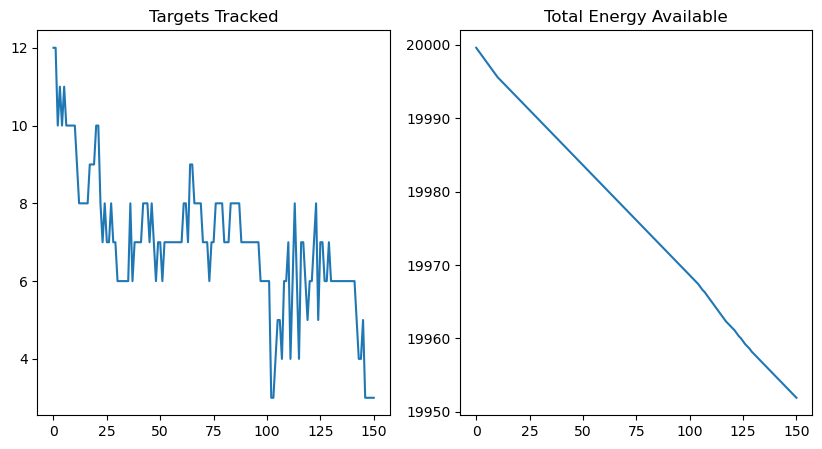

In [4]:
env_test.env_stats(plot=True);

In [9]:
hist = ep_sensors[0].agent.model.history


2

In [12]:
hist.history

{'loss': [3.900766372680664], 'MSE': [3.900766372680664]}

In [5]:
len(test_target)

60

The unique targets tracked:  [  1.   2.   6.   7.  10.  11.  13.  15.  16.  17.  18.  21.  23.  26.
  33.  35.  36.  40.  42.  43.  44.  45.  46.  49.  54.  55.  56.  62.
  64.  65.  66.  67.  70.  71.  74.  75.  78.  81.  83.  84.  85.  86.
  87.  92.  93.  96.  97.  99. 100. 102. 104. 105. 106. 108.]
The number of unique targets tracked:  54


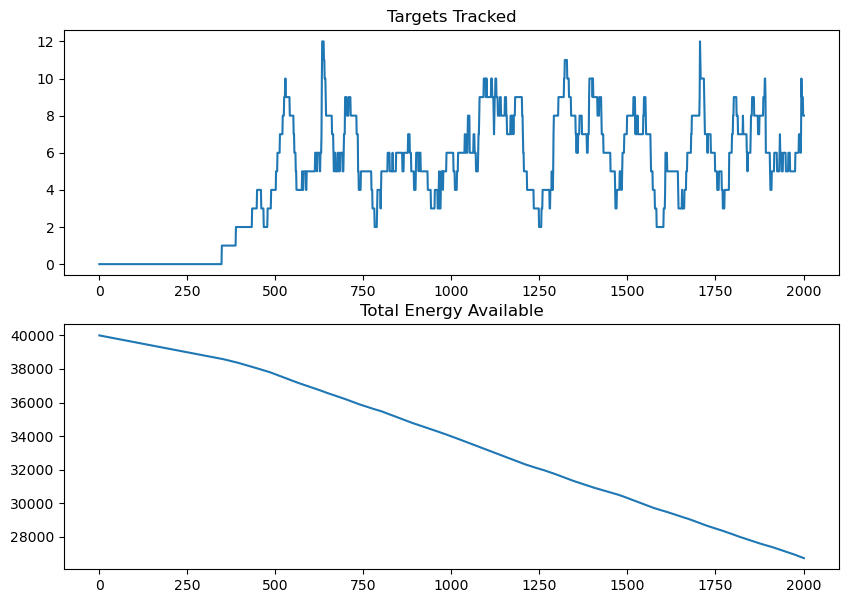

In [7]:
plot = True
# equalize the array sizes for processing
track_temp = np.zeros([len(env_test.tracked),len(max(env_test.tracked,key = lambda x: len(x)))])

for i,j in enumerate(env_test.tracked):
    track_temp[i][0:len(j)] = j

# show the number of targets tracked and their IDs
print('The unique targets tracked: ',np.unique(track_temp)[1:]) # excludes the zero used for padding the arrays.
print('The number of unique targets tracked: ', len(np.unique(track_temp))-1) # -1 so we dont count the zero

if plot:

    fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))
    #fig.suptitle('Vertically stacked subplots')
    ax1.plot(np.count_nonzero(track_temp, axis=1))
    ax1.set_title('Targets Tracked')
    ax2.plot(env_test.energy)
    ax2.set_title('Total Energy Available')


In [40]:
np.nonzero(region_map)

NameError: name 'region_map' is not defined

In [10]:
region_map[75,22]

1.0

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense

In [3]:
model = Sequential([
            Conv2D(32,8, strides = 2, activation='relu', input_shape=(200,200,1)),
            Conv2D(64,4,strides = 2, activation='relu'),
            Conv2D(64,3,strides = 1, activation='relu'),
            Flatten(),
            Dense(128, activation ='relu'),
            Dense(3, activation='linear')
        ])

model.compile(loss='mse', #'huber'
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['MSE'])

In [150]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 97, 97, 32)        2080      
                                                                 
 conv2d_10 (Conv2D)          (None, 47, 47, 64)        32832     
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 129600)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               16588928  
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 16661155 (63.56 MB)
Trainable params: 16

In [151]:
model.save("test.keras")

In [4]:
model.load_weights("test.keras")

In [7]:
model_1 = tf.keras.models.load_model('test.keras')

In [8]:
model_2 = tf.keras.models.load_model('model_0_25k-50k.keras')

ValueError: Layer 'conv2d' expected 2 variables, but received 0 variables during loading. Expected: ['conv2d/kernel:0', 'conv2d/bias:0']

In [12]:
w_test = model.get_weights()

In [17]:
w_n3 = np.array(w_test, dtype=object)
#np.array(w_test) # error

In [19]:
w_avg = (w_n3 + w_n3)/2

In [20]:
model.set_weights(w_avg)

In [5]:
some_list =[4,6,2,4]
some_list

[4, 6, 2, 4]

In [6]:
np.argmax(some_list)

1

In [2]:
some_list.pop()

4

In [3]:
some_list

[4, 6, 2]

In [6]:
some_list.index(6)

1

In [7]:
some_list.pop(1)
some_list

[4, 2, 4]

In [4]:
len(test_target)

60

In [9]:
1 % 2 

1

In [1]:
test_dic = {(408, 425):'right'}

In [6]:
test_dic.get((408,425))

'right'

In [8]:
test_dic[(410,425)]='right'

In [9]:
test_dic

{(408, 425): 'right', (410, 425): 'right'}

In [11]:
test_set = set()

In [17]:
test_set.add(2)

In [34]:
random.randint(0,2)

1

In [39]:
333//30 # int division technically division with the math.floor function

11

In [28]:
import numpy as np

epsilon = 1 # Epsilon-greedy algorithm in initialized at 1 meaning every step is random at the start
max_epsilon = 1 # You can't explore more than 100% of the time
min_epsilon = 0.05 # At a minimum, we'll always explore 1% of the time
decay = 0.0001
episode =0

for i in range(50000):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay * episode)
    print(epsilon)
    episode = i

1.0
1.0
0.9999050047498417
0.9998100189987335
0.9997150427457253
0.9996200759898677
0.9995251187302109
0.9994301709658051
0.9993352326957011
0.9992403039189496
0.999145384634601
0.9990504748417063
0.9989555745393163
0.9988606837264821
0.9987658024022547
0.9986709305656853
0.9985760682158253
0.9984812153517261
0.9983863719724388
0.9982915380770154
0.9981967136645074
0.9981018987339664
0.9980070932844445
0.9979122973149935
0.9978175108246655
0.9977227338125126
0.9976279662775871
0.9975332082189413
0.9974384596356275
0.9973437205266983
0.9972489908912063
0.9971542707282044
0.997059560036745
0.9969648588158813
0.9968701670646661
0.9967754847821527
0.9966808119673941
0.9965861486194436
0.9964914947373548
0.9963968503201808
0.9963022153669753
0.9962075898767919
0.9961129738486845
0.9960183672817068
0.9959237701749128
0.9958291825273565
0.995734604338092
0.9956400356061736
0.9955454763306556
0.9954509265105923
0.9953563861450383
0.9952618552330482
0.9951673337736766
0.9950728217659784
0.99497

In [44]:
np.random.rand()

0.17329432007084578

In [59]:
random.randint(0,2)

0

In [117]:
threshold = 4

numList = [1,2,3,4,5,6,7,8,9]

def minNum(threashold, numbers):
    minCount = 0

    if len(numbers) < 1: return minCount

    elif len(numbers) == 1: return minCount + 1

    elif len(numbers) <=3: return minCount + 2

    a = numbers[0] + numbers[1]
    b = numbers[0] + numbers[2]

    numbers.pop(0)
    numbers.pop(0)
    numbers.pop(0)

    def dp(a, b, minCount, numbers, threashold):
        print('dp triggered. a = {}, b = {}'.format(a,b))
        print('minCount is: ',minCount)
        if len(numbers) == 0: return minCount
        
        if abs(a - b) >= threashold: return minCount

        num_1 = numbers.pop(0)
        num_2 = numbers.pop(0)

        minCount += 1

        minCount_1 = dp(a+num_1, b+num_2, minCount, numbers, threashold)
        minCount_2 = dp(a+num_2, b+num_1, minCount, numbers, threashold)

        if minCount_1 >= threashold: 
            print('Found it minCount_1')
            return minCount_1
        elif minCount_2 >= threashold: return minCount_2
        else:
            minCount = max(minCount_1,minCount_2)

        return minCount

    minCount = dp(a,b, minCount+3, numbers, threashold)

    return minCount

In [125]:
numList = [1,2,5,8,9]

In [126]:
minNum(4, numList)

dp triggered. a = 3, b = 6
minCount is:  3
dp triggered. a = 11, b = 15
minCount is:  4
dp triggered. a = 12, b = 14
minCount is:  4
Foudn it minCount_1


4

In [82]:
numList = [1,2,3,4,5]

In [83]:
numList.pop(0)

1

In [84]:
somlist = []
len(somlist)

0